In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
data =pd.read_csv('/content/dataset.csv')

In [3]:
data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [5]:
data.shape

(300, 2)

In [6]:
x= data['x']
y=data['y']

In [7]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [8]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


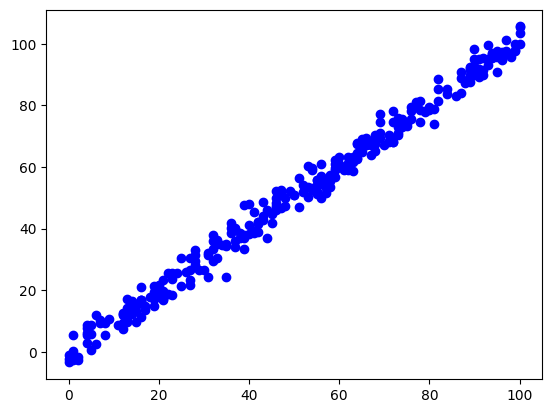

In [10]:
plt.scatter(x,y,c='b')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.shape,x_test.shape

((240,), (60,))

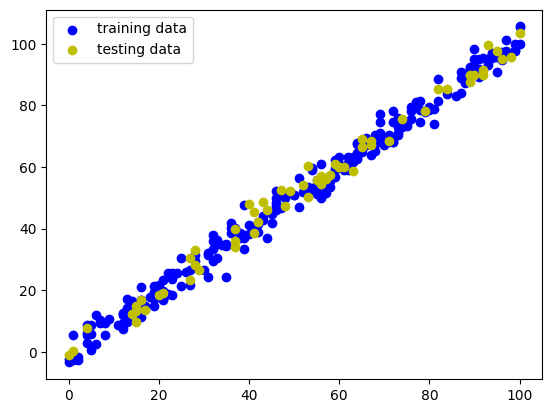

In [15]:
plt.scatter(x_train,y_train,c='b',label='training data')
plt.scatter(x_test,y_test,c='y',label='testing data')
plt.legend()
plt.show()

###Model Building

In [47]:
#create a model
model=  tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#complie model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics= ['mae'])


#train model
epoch_number=10
history = model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 39.4182 - mae: 39.4182
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12.3274 - mae: 12.3274  
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8991 - mae: 5.8991 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6686 - mae: 4.6686 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8935 - mae: 3.8935 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1444 - mae: 3.1444 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7239 - mae: 2.7239 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9328 - mae: 2.9328  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8613 - mae: 2.8613 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5874 - mae: 2.5874 


In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [49]:
y_prediction=model.predict(x_test)
y_prediction[0:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


array([[ 67.97575 ],
       [ 27.268671],
       [ 97.488396],
       [101.5591  ],
       [ 28.286346]], dtype=float32)

In [50]:
y_test.head(5)

,y
208,68.488207
188,30.494129
12,95.149072
221,103.526616
239,28.156685


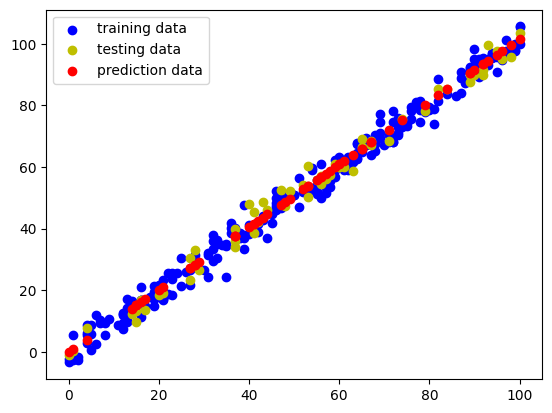

In [51]:
plt.scatter(x_train,y_train,c='b',label='training data')
plt.scatter(x_test,y_test,c='y',label='testing data')
plt.scatter(x_test,y_prediction,c='r',label='prediction data')
plt.legend()
plt.show()

In [52]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 2.2949 - mae: 2.2949


[2.3322906494140625, 2.3322906494140625]

In [53]:
mae = tf.keras.losses.mae(y_test, tf.squeeze(y_prediction))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.3322906494140625>

In [54]:
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_prediction))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=8.320403099060059>

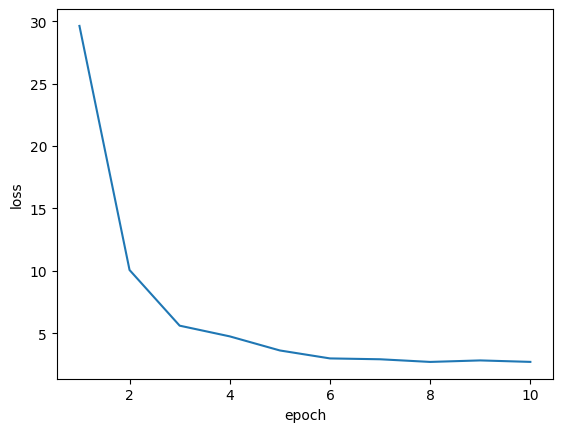

In [55]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [56]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[ 1.73935853e-02 -3.24197533e-03 -2.17077211e-02  3.42017651e-01
   1.74249411e-01  3.23733181e-01  3.99075961e-03  4.02436312e-03
   1.56802192e-01  1.45707419e-02  1.75767124e-01 -6.85296431e-02
   1.68505341e-01 -1.85618494e-02  1.13352365e-03 -2.32776385e-02
   6.80377260e-02  5.88517287e-05 -1.42313773e-02  3.43520977e-02
   8.43590349e-02 -3.49383466e-02 -3.57870236e-02  5.34256734e-03
   6.57612085e-02 -2.89397836e-01 -1.47909641e-01 -2.91157871e-01
  -2.64947545e-02  6.88731554e-04  3.39192972e-02  1.58559531e-02
  -5.17024100e-02 -1.24244206e-01 -1.25137065e-02 -8.50495882e-03
  -1.42062623e-02 -4.85409386e-02 -6.86353352e-03  1.33314729e-02
  -1.16219390e-02  2.99620796e-02 -1.44037470e-01  1.77704751e-01
   6.49195164e-03 -1.54299932e-02  1.88036170e-02  1.87545434e-01
  -1.29278168e-01  7.95281306e-03 -1.04763955e-01  2.97812074e-02
   1.41732823e-02  2.34889258e-02 -2.64640123e-01  3.17632081e-03
   1.16851730e-02  2.50829428e-01  2.11300813e-02  4.03744448e-03